In [1]:
# loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# loading data into python environment
data=pd.read_csv('HR salary data.csv')

In [4]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Salary
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### Understanding the dataset

In [6]:
data.shape

(48842, 15)

In [43]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Salary'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  Salary           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### 1. Missing value handling

In [8]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
Salary             0
dtype: int64

In [9]:
print('Number of Columns in the dataset:',data.shape[1])
print('Number of rows in the dataset:',data.shape[0])

Number of Columns in the dataset: 15
Number of rows in the dataset: 48842


In [33]:
def unique(data):
    for col in data.columns:
        print ("Unique values in {}.".format(col))
        print(data[col].unique(),"\n")

In [34]:
unique(data)

Unique values in age.
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86] 

Unique values in workclass.
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

Unique values in fnlwgt.
[226802  89814 336951 ... 129912 255835 257302] 

Unique values in education.
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool'] 

Unique values in educational-num.
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1] 

Unique values in marital-status.
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] 

Unique values in occupation.
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '

#### Findings

~ The dataset contain 48,842 entries with 15 columns representing different features

~ There is no missing values

~ There is a special character "?" in workclass, Occupation and country


In [36]:
data['workclass'].mode()

0    Private
dtype: object

In [37]:
data['occupation'].mode()

0    Prof-specialty
dtype: object

In [38]:
data['native-country'].mode()

0    United-States
dtype: object

In [40]:
data['workclass']=data['workclass'].replace('?','Private')
data['occupation']=data['occupation'].replace('?','Prof-speciality')
data['native-country']=data['native-country'].replace('?','United-States')

### 2. Checking for duplicates

In [45]:
sum(data.duplicated(data.columns))

52

In [46]:
data=data.drop_duplicates(data.columns, keep='last')
sum(data.duplicated(data.columns))

0

In [47]:
data.shape

(48790, 15)

### 3. Handling Outliers

In [52]:
df=data

<AxesSubplot:xlabel='age'>

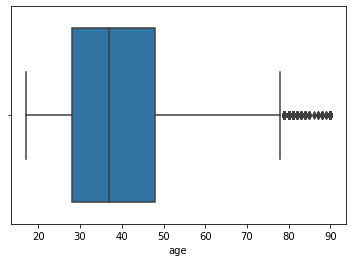

In [50]:
#age
sns.boxplot(data['age'])

In [54]:
q1 = np.percentile(df['age'],25,interpolation='midpoint')
q3 = np.percentile(df['age'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df['age'][(df['age']<low_limit)|(df['age']>high_limit)].index
df.drop(index,inplace=True)

<AxesSubplot:xlabel='age'>

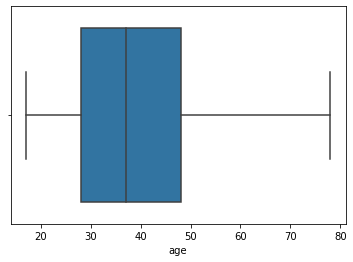

In [55]:
sns.boxplot(df['age'])

<AxesSubplot:xlabel='fnlwgt'>

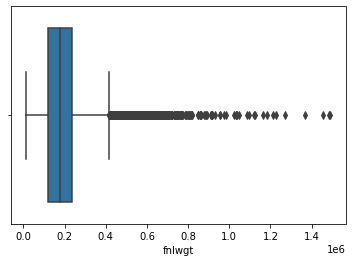

In [56]:
# fnlwgt
sns.boxplot(df['fnlwgt'])

In [58]:
q1 = np.percentile(df['fnlwgt'],25,interpolation='midpoint')
q3 = np.percentile(df['fnlwgt'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df['fnlwgt'][(df['fnlwgt']<low_limit)|(df['fnlwgt']>high_limit)].index
df.drop(index,inplace=True)

<AxesSubplot:xlabel='fnlwgt'>

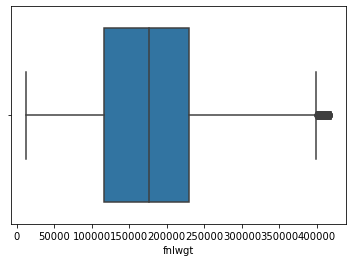

In [59]:
sns.boxplot(df['fnlwgt'])

<AxesSubplot:xlabel='capital-gain'>

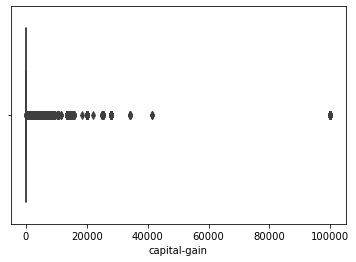

In [60]:
# capital gain
sns.boxplot(df['capital-gain'])

In [62]:
q1 = np.percentile(df['capital-gain'],25,interpolation='midpoint')
q3 = np.percentile(df['capital-gain'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df['capital-gain'][(df['capital-gain']<low_limit)|(df['capital-gain']>high_limit)].index
df.drop(index,inplace=True)

<AxesSubplot:xlabel='capital-gain'>

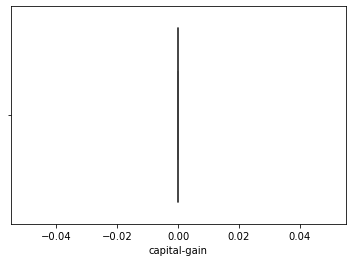

In [63]:
sns.boxplot(df['capital-gain'])

<AxesSubplot:xlabel='capital-loss'>

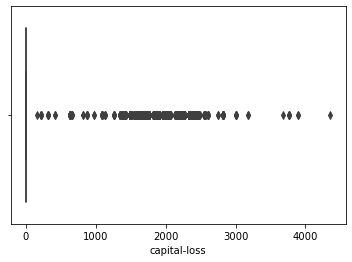

In [64]:
# capital loss
sns.boxplot(df['capital-loss'])

In [66]:
q1 = np.percentile(df['capital-loss'],25,interpolation='midpoint')
q3 = np.percentile(df['capital-loss'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df['capital-loss'][(df['capital-loss']<low_limit)|(df['capital-loss']>high_limit)].index
df.drop(index,inplace=True)

<AxesSubplot:xlabel='capital-loss'>

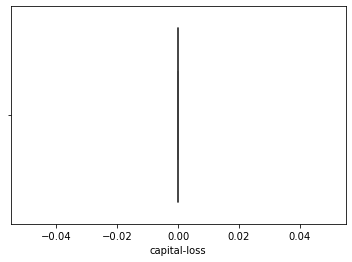

In [67]:
sns.boxplot(df['capital-loss'])

<AxesSubplot:xlabel='hours-per-week'>

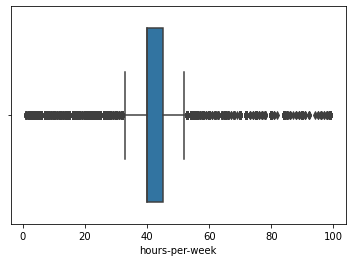

In [68]:
# hours per week
sns.boxplot(df['hours-per-week'])

In [69]:
q1 = np.percentile(df['hours-per-week'],25,interpolation='midpoint')
q3 = np.percentile(df['hours-per-week'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df['hours-per-week'][(df['hours-per-week']<low_limit)|(df['hours-per-week']>high_limit)].index
df.drop(index,inplace=True)

<AxesSubplot:xlabel='hours-per-week'>

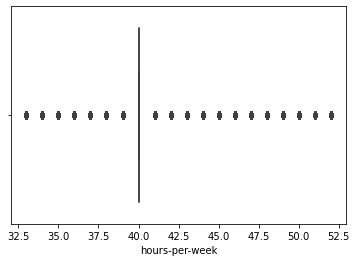

In [70]:
sns.boxplot(df['hours-per-week'])

In [71]:
df.shape

(29613, 15)

### 4. Feature reduction

In [72]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,29613.000000,29613.000000,29613.000000,29613.0,29613.0,29613.00000
mean,38.305879,181241.564752,9.990207,0.0,0.0,41.44342
std,12.221573,87328.368955,2.487733,0.0,0.0,3.94661
min,17.000000,13769.000000,1.000000,0.0,0.0,33.00000
25%,28.000000,117222.000000,9.000000,0.0,0.0,40.00000
50%,37.000000,177083.000000,10.000000,0.0,0.0,40.00000
75%,47.000000,230961.000000,12.000000,0.0,0.0,40.00000
max,78.000000,417668.000000,16.000000,0.0,0.0,52.00000


In [73]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', 'Bachelors',
       'Masters', 'Doctorate', '5th-6th', '10th', 'Assoc-voc', '7th-8th',
       '9th', 'Prof-school', '12th', '1st-4th', 'Preschool'], dtype=object)

In [74]:
df['educational-num'].unique()

array([ 7,  9, 12, 10, 13, 14, 16,  3,  6, 11,  4,  5, 15,  8,  2,  1],
      dtype=int64)

The features capital gain and capital loss have 75 percentage data as 0

The education and education num conveys the same information

In [75]:
df.drop(['capital-gain','capital-loss','educational-num'], axis = 1,inplace = True)
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,Salary
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
6,29,Private,227026,HS-grad,Never-married,Prof-speciality,Unmarried,Black,Male,40,United-States,<=50K
8,24,Private,369667,Some-college,Never-married,Other-service,Unmarried,White,Female,40,United-States,<=50K


In [76]:
df.shape

(29613, 12)

In marital-status column, there are 6 different values which means the same as two values-married or not married. so rearranging them. 

In [77]:
df.replace(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent','Never-married','Separated','Widowed'],
             ['divorced','married','married','married','not married','not married','not married'], inplace = True)

In [79]:
df['marital-status'].value_counts()

married        13864
not married    11218
divorced        4531
Name: marital-status, dtype: int64

### 5. Data Visualization

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'hours-per-week'}>, <AxesSubplot:>]],
      dtype=object)

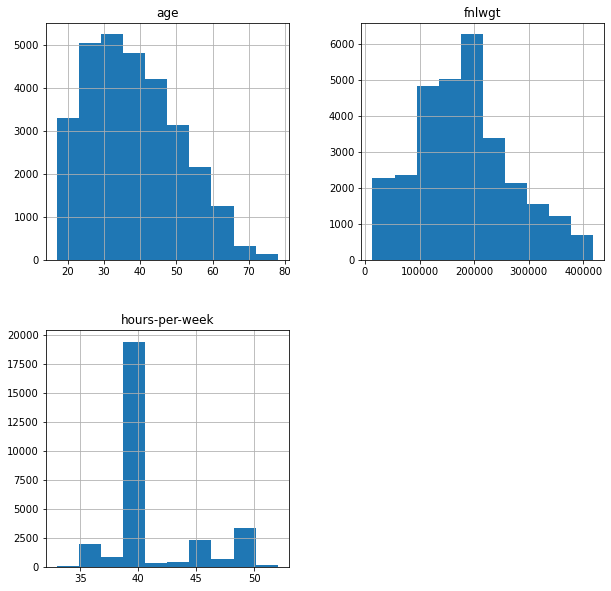

In [82]:
df.hist(figsize=(10,10))

~The min age is 17 and maximum age is 78.
The most of the working age group lies in between 23 to 36

~The min hours-per-week is 33 and max is 52.
The highest among hours per week is in between 38 to 41


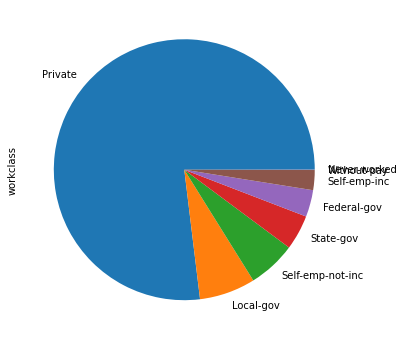

In [84]:
df['workclass'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (8,8)
plt.show()

In work class, there are more than 75% people are privately employed

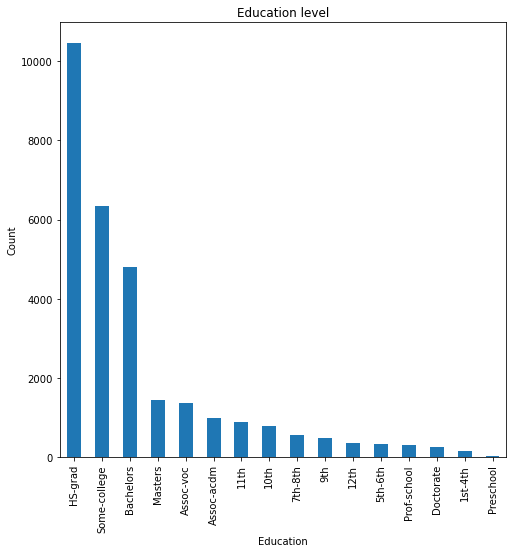

In [85]:
df['education'].value_counts().plot(kind = 'bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (8,8)
plt.title('Education level')
plt.show()

Here we can clearly see that majority of the people are completed Hs-graduation,or attended college or compleated masters.

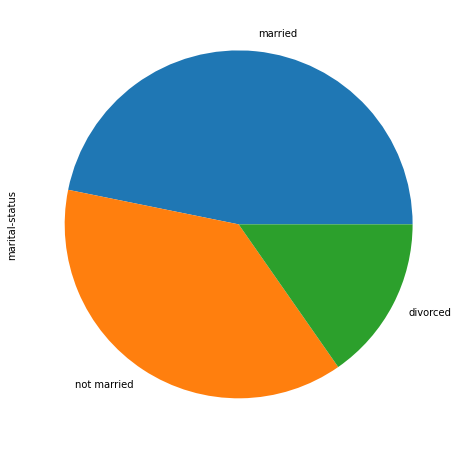

In [88]:
df['marital-status'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (8,8)
plt.show()

Nearly 45% employees are married and 35% are not married

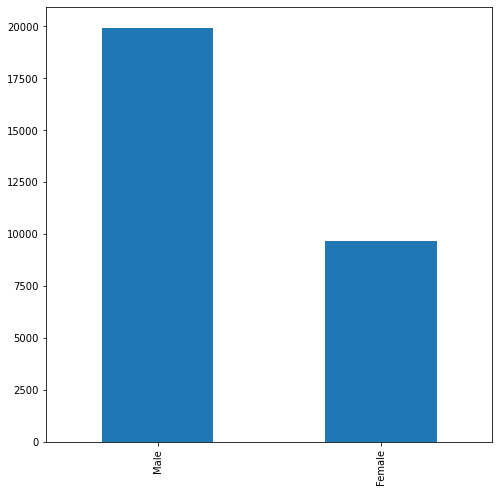

In [89]:
df['gender'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (6,6)
plt.show()

75% of employees are male

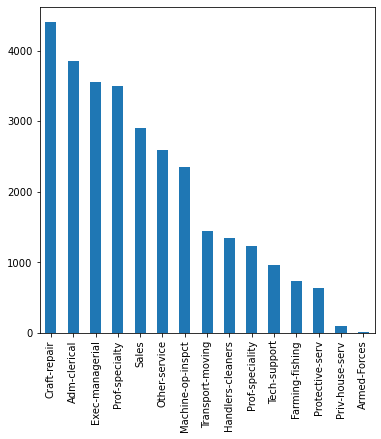

In [90]:
df['occupation'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (8,8)
plt.show()

Here craft-repair workers are more and armed forces are very few

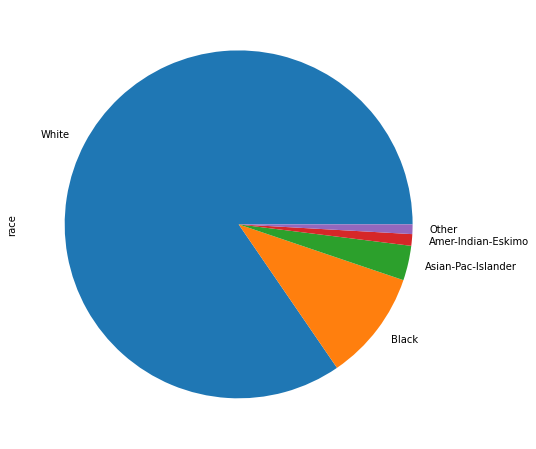

In [91]:
df['race'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (8,8)
plt.show()

When it comes to race, more than 80% among them are white 

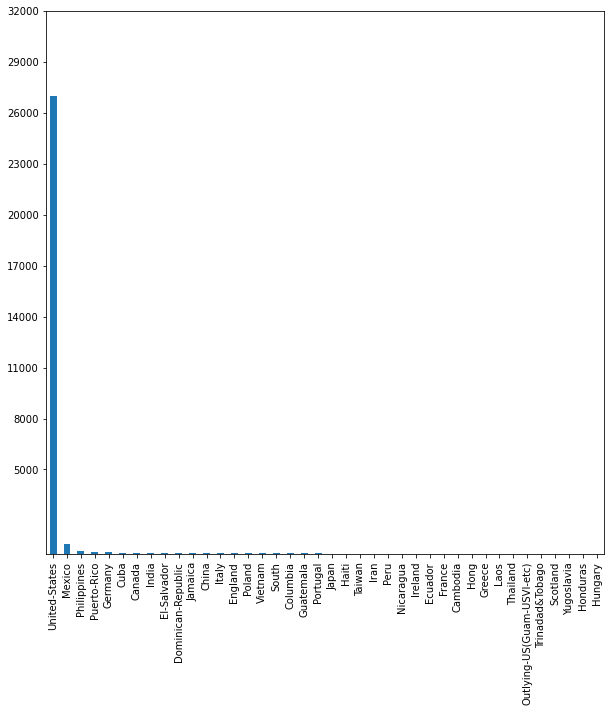

In [93]:
df['native-country'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (8,8)
plt.yticks(np.arange(5000,33000,3000))
plt.show()

More than 90% of the people belongs to US

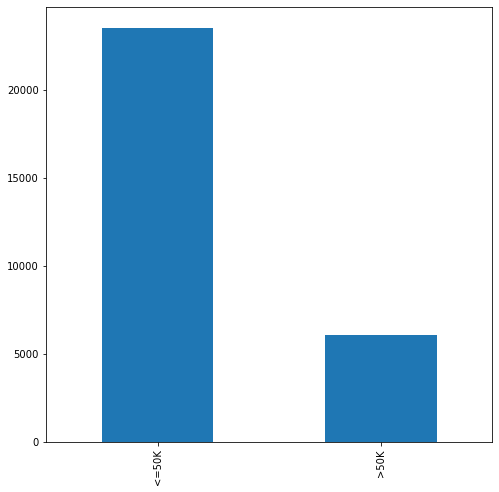

In [94]:
df['Salary'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (8,8)
plt.show()

Here there are nearly 75% of the people's salary is below 50k

In [96]:
# seperate data into numeric and categorical
numeric_data = df.select_dtypes(include=np.number) 
categorical_data = df.select_dtypes(exclude=np.number)

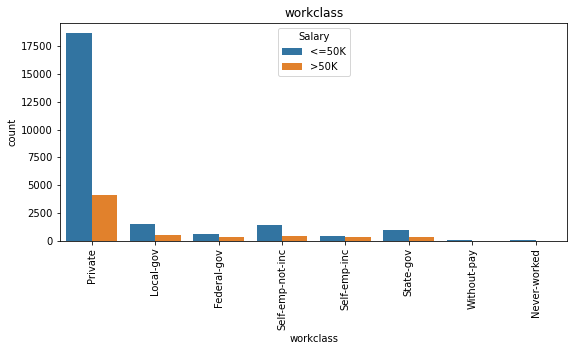

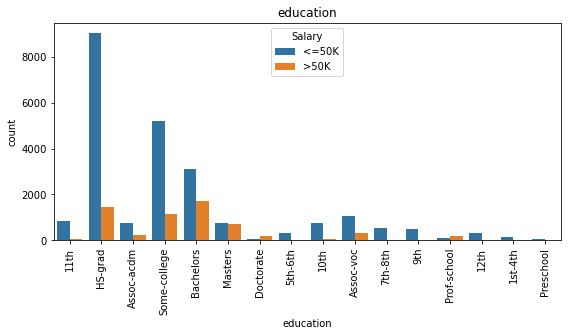

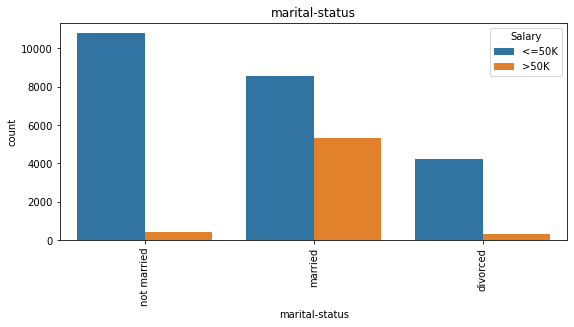

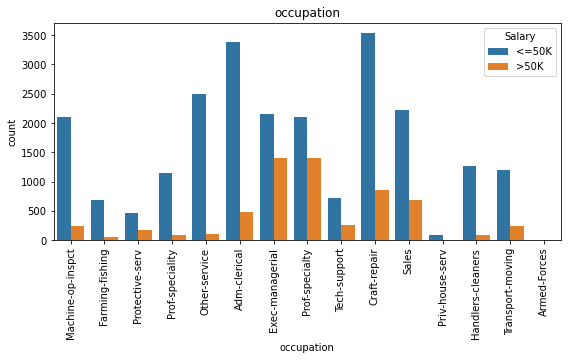

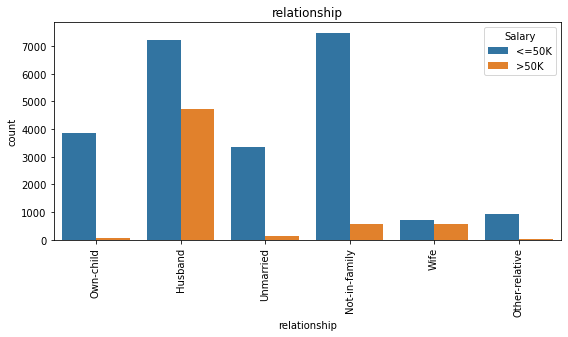

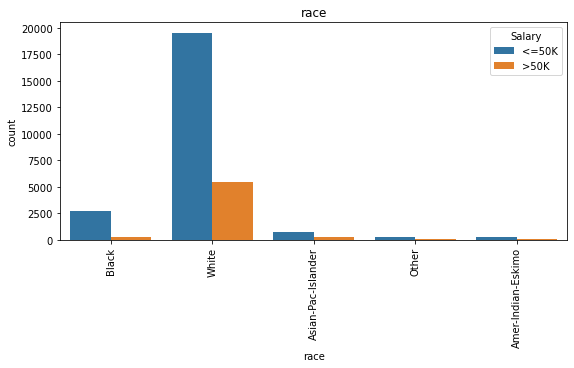

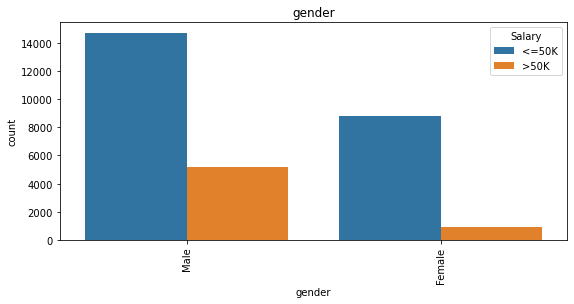

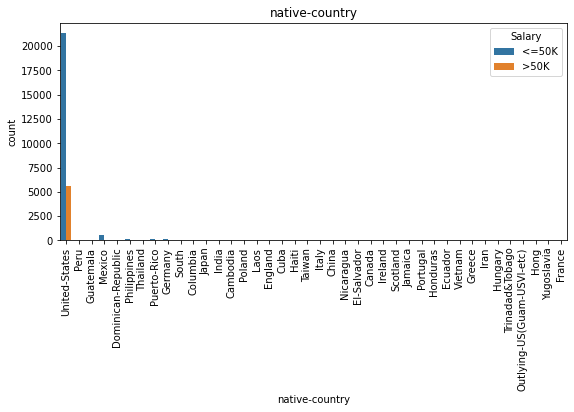

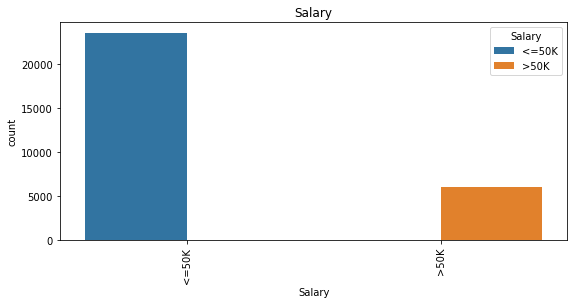

In [97]:
for column in categorical_data:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=categorical_data[column],hue=categorical_data['Salary'],data=categorical_data)
    plt.title(column)    
    plt.xticks(rotation=90)

The people who got the income more than 50k are;

~ private employees 

~ Bachelors, HS-graduates, college graduates and masters 

~ people who are married

~ Individuals who's occupation are exec-managerial or having professional speciality.

~ Individuals who are husbands

~ White peoples

~ Male

~ people living in US


### 6. Feature Engineering

In [98]:
df.education = df.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
df.education = df.education.replace('HS-grad', 'high school')
df.education = df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
df.education = df.education.replace('Bachelors', 'undergrad')
df.education = df.education.replace('Masters', 'grad')
df.education = df.education.replace('Doctorate', 'doc')

### 7. Encoding

In [103]:
# one hot encoding
one_hot_features = ['marital-status','gender']
df = pd.get_dummies(df, columns=one_hot_features)

In [104]:
df.head()

,age,workclass,fnlwgt,education,occupation,relationship,race,hours-per-week,native-country,Salary,marital-status_divorced,marital-status_married,marital-status_not married,gender_Female,gender_Male
0,25,Private,226802,school,Machine-op-inspct,Own-child,Black,40,United-States,<=50K,0,0,1,0,1
1,38,Private,89814,high school,Farming-fishing,Husband,White,50,United-States,<=50K,0,1,0,0,1
2,28,Local-gov,336951,higher,Protective-serv,Husband,White,40,United-States,>50K,0,1,0,0,1
6,29,Private,227026,high school,Prof-speciality,Unmarried,Black,40,United-States,<=50K,0,0,1,0,1
8,24,Private,369667,higher,Other-service,Unmarried,White,40,United-States,<=50K,0,0,1,1,0


In [106]:
# Label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric 
df['workclass']  = le.fit_transform(df['workclass'])
df['education']  = le.fit_transform(df['education'])
df['occupation']  = le.fit_transform(df['occupation'])
df['relationship']  = le.fit_transform(df['relationship'])
df['race']  = le.fit_transform(df['race'])
df['native-country']  = le.fit_transform(df['native-country'])

In [107]:
df.head()

,age,workclass,fnlwgt,education,occupation,relationship,race,hours-per-week,native-country,Salary,marital-status_divorced,marital-status_married,marital-status_not married,gender_Female,gender_Male
0,25,3,226802,4,6,3,2,40,37,<=50K,0,0,1,0,1
1,38,3,89814,2,4,0,4,50,37,<=50K,0,1,0,0,1
2,28,1,336951,3,11,0,4,40,37,>50K,0,1,0,0,1
6,29,3,227026,2,9,4,2,40,37,<=50K,0,0,1,0,1
8,24,3,369667,3,7,4,4,40,37,<=50K,0,0,1,1,0
